In [1]:
import bioMass.dataViz as dv
from bioMass.dataloader import SentinelDataset, SentinelDataModule
from bioMass.model import Unet, DoubleStreamUnet
from pytorch_lightning import Trainer
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, random_split
from tqdm.notebook import tqdm
from torch import nn
import os
import numpy as np
import pandas as pd
from glob import glob
import yaml
import tifffile
from skimage import io
from joblib import Parallel, delayed


from pytorch_lightning import loggers as pl_loggers

%config Completer.use_jedi = False
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
dm = SentinelDataModule(max_chips=None, loader_type='Moran', is_train=True, loader_device='cpu', num_workers=24)
dm.setup('fit')

test_dataloader = dm.test_dataloader()

In [3]:
for sample in test_dataloader:
    sample
    break


In [12]:
x = sample['image_s1']

for i, img in enumerate(x):
    img = img.flatten(start_dim=1, end_dim=2)
    print(i, torch.corrcoef(img))

0 tensor([[1.0000, 0.8249,    nan,    nan],
        [0.8249, 1.0000,    nan,    nan],
        [   nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan]])
1 tensor([[1.0000, 0.5340, 0.0302, 0.0613],
        [0.5340, 1.0000, 0.0909, 0.3135],
        [0.0302, 0.0909, 1.0000, 0.6086],
        [0.0613, 0.3135, 0.6086, 1.0000]])
2 tensor([[1.0000, 0.9044, 0.8234, 0.7851],
        [0.9044, 1.0000, 0.7967, 0.8572],
        [0.8234, 0.7967, 1.0000, 0.9096],
        [0.7851, 0.8572, 0.9096, 1.0000]])
3 tensor([[1.0000, 0.9569, 0.5172, 0.4575],
        [0.9569, 1.0000, 0.5254, 0.4762],
        [0.5172, 0.5254, 1.0000, 0.8492],
        [0.4575, 0.4762, 0.8492, 1.0000]])
4 tensor([[1.0000, 0.9322, 0.6054, 0.6001],
        [0.9322, 1.0000, 0.6201, 0.6538],
        [0.6054, 0.6201, 1.0000, 0.9015],
        [0.6001, 0.6538, 0.9015, 1.0000]])
5 tensor([[1.0000, 0.6316, 0.2461, 0.3448],
        [0.6316, 1.0000, 0.2181, 0.7350],
        [0.2461, 0.2181, 1.0000, 0.5353],
        [0.3448, 

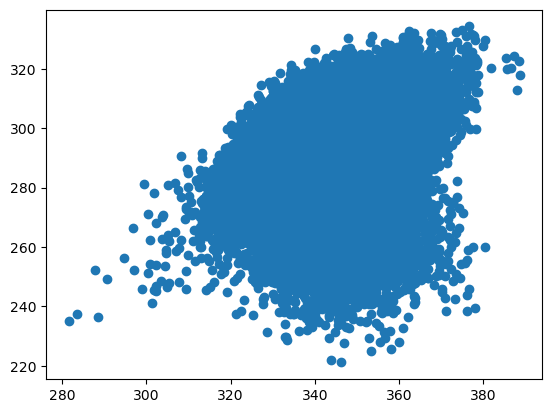

In [20]:
plt.scatter(x[27][0].numpy(), x[27][1].numpy())

In [9]:
img.shape

torch.Size([10, 65536])

In [13]:
x = sample['image_s2']

for i, img in enumerate(x):
    img = img.flatten(start_dim=1, end_dim=2)
    print(i, torch.corrcoef(img)[0][1])

0 tensor(0.9618)
1 tensor(0.9712)
2 tensor(0.9842)
3 tensor(0.9721)
4 tensor(0.9689)
5 tensor(0.8773)
6 tensor(0.9401)
7 tensor(0.9541)
8 tensor(0.9596)
9 tensor(0.9915)
10 tensor(0.9325)
11 tensor(0.8788)
12 tensor(0.9679)
13 tensor(0.9738)
14 tensor(0.9526)
15 tensor(0.8530)
16 tensor(0.8565)
17 tensor(0.9858)
18 tensor(0.9330)
19 tensor(0.9782)
20 tensor(0.9295)
21 tensor(0.9124)
22 tensor(0.9921)
23 tensor(0.9759)
24 tensor(0.9766)
25 tensor(0.8865)
26 tensor(0.9499)
27 tensor(0.9198)
28 tensor(0.9645)
29 tensor(0.9832)
30 tensor(0.9599)
31 tensor(0.8362)


In [14]:
torch.corrcoef(img)

tensor([[1.0000, 0.8362, 0.7988, 0.5976, 0.2679, 0.2385, 0.2631, 0.2347, 0.4897,
         0.5942, 0.6207],
        [0.8362, 1.0000, 0.9011, 0.8390, 0.6079, 0.5809, 0.6155, 0.5761, 0.7451,
         0.7891, 0.7469],
        [0.7988, 0.9011, 1.0000, 0.8520, 0.4932, 0.4692, 0.5123, 0.4882, 0.7931,
         0.8603, 0.8350],
        [0.5976, 0.8390, 0.8520, 1.0000, 0.8089, 0.7972, 0.7691, 0.8126, 0.9474,
         0.9292, 0.7638],
        [0.2679, 0.6079, 0.4932, 0.8089, 1.0000, 0.9905, 0.9385, 0.9823, 0.7923,
         0.6820, 0.5048],
        [0.2385, 0.5809, 0.4692, 0.7972, 0.9905, 1.0000, 0.9417, 0.9889, 0.7866,
         0.6663, 0.4886],
        [0.2631, 0.6155, 0.5123, 0.7691, 0.9385, 0.9417, 1.0000, 0.9433, 0.7623,
         0.6492, 0.5450],
        [0.2347, 0.5761, 0.4882, 0.8126, 0.9823, 0.9889, 0.9433, 1.0000, 0.8153,
         0.6927, 0.5160],
        [0.4897, 0.7451, 0.7931, 0.9474, 0.7923, 0.7866, 0.7623, 0.8153, 1.0000,
         0.9688, 0.7774],
        [0.5942, 0.7891, 0.8603, 0.92

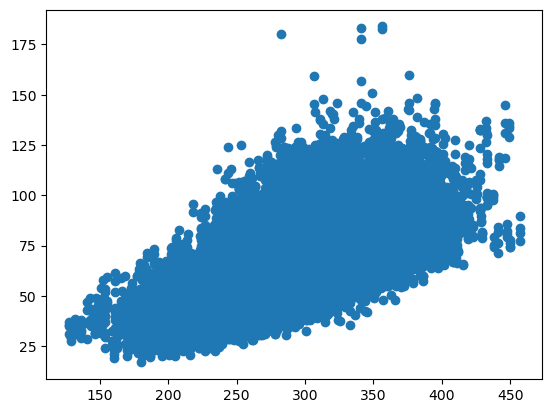

In [10]:
plt.scatter(x[27][5].numpy(), x[27][1].numpy())